In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mt
import plotly.express as px

AULA 1 Analise exploratoria dos dados

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print("O numero de linhas é", linhas)
print("O numero de colunas é", colunas)

O numero de linhas é 133349
O numero de colunas é 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
novos_nomes = {
    'work_year': 'Ano',
    'experience_level': 'Senioridade',
    'employment_type': 'Contrato',
    'job_title': 'Cargo',
    'salary': 'Salario',
    'salary_currency': 'Moeda',
    'salary_in_usd': 'USD',
    'employee_residence': 'Residencia',
    'remote_ratio': 'Remoto',
    'company_location': 'Empresa',
    'company_size': 'Tamanho_empresa'
}

df.rename(columns=novos_nomes, inplace=True)

df.head()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df["Senioridade"].value_counts()

,count
Senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df["Contrato"].value_counts()

,count
Contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df["Remoto"].value_counts()

,count
Remoto,
0,105312
100,27718
50,319


In [ ]:
df["Tamanho_empresa"].value_counts()

,count
Tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
Senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['Senioridade'] = df['Senioridade'].replace(Senioridade)
df['Senioridade'].value_counts()

,count
Senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
Contrato = {
    'FT': 'Integral',
    'PT': 'Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}
df['Contrato'] = df['Contrato'].replace(Contrato)
df['Contrato'].value_counts()

,count
Contrato,
Integral,132563
Contrato,394
Parcial,376
Freelancer,16


In [ ]:
tamanho_empresa = {
    'L': 'Grande',
    'S': 'Pequena',
    'M':        'Media'

}
df['Tamanho_empresa'] = df['Tamanho_empresa'].replace(tamanho_empresa)
df['Tamanho_empresa'].value_counts()

,count
Tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [ ]:
mapa_trabalho = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Hibrido'
}

df['Remoto'] = df['Remoto'].replace(mapa_trabalho)
df['Remoto'].value_counts()

,count
Remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [ ]:
df.head()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [ ]:
df.describe(include='object')

,Senioridade,Contrato,Cargo,Moeda,Residencia,Remoto,Empresa,Tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


AULA 2, Limpeza e organização de dados

In [ ]:
df.isnull()


,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Ano,10
Senioridade,0
Contrato,0
Cargo,0
Salario,0
Moeda,0
USD,0
Residencia,0
Remoto,0
Empresa,0


In [ ]:
df["Ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [ ]:
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

#substitui os null ou nan pela media e arredonda por 2
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

#susbstitui os null ou nan pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas ["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({
  'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
  'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [ ]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
Ano,0
Senioridade,0
Contrato,0
Cargo,0
Salario,0
Moeda,0
USD,0
Residencia,0
Remoto,0
Empresa,0


In [ ]:
df_limpo.head()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Ano              133339 non-null  float64
 1   Senioridade      133339 non-null  object 
 2   Contrato         133339 non-null  object 
 3   Cargo            133339 non-null  object 
 4   Salario          133339 non-null  int64  
 5   Moeda            133339 non-null  object 
 6   USD              133339 non-null  int64  
 7   Residencia       133339 non-null  object 
 8   Remoto           133339 non-null  object 
 9   Empresa          133339 non-null  object 
 10  Tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo = df_limpo.assign(Ano = df_limpo['Ano'].astype('int64'))

In [ ]:
df_limpo.head()

,Ano,Senioridade,Contrato,Cargo,Salario,Moeda,USD,Residencia,Remoto,Empresa,Tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


Aula 3 Criação de graficos para visualização dos dados

In [ ]:
df_limpo["Senioridade"]

,Senioridade
0,Senior
1,Senior
2,Pleno
3,Pleno
4,Junior
...,...
133344,Senior
133345,Pleno
133346,Junior
133347,Junior


<Axes: title={'center': 'Senioridade'}, xlabel='Senioridade'>

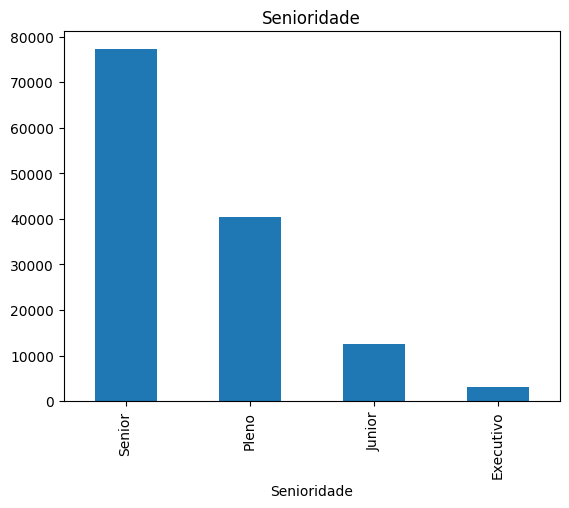

In [ ]:
df_limpo["Senioridade"].value_counts().plot(kind="bar", title="Senioridade")

<Axes: xlabel='Senioridade', ylabel='USD'>

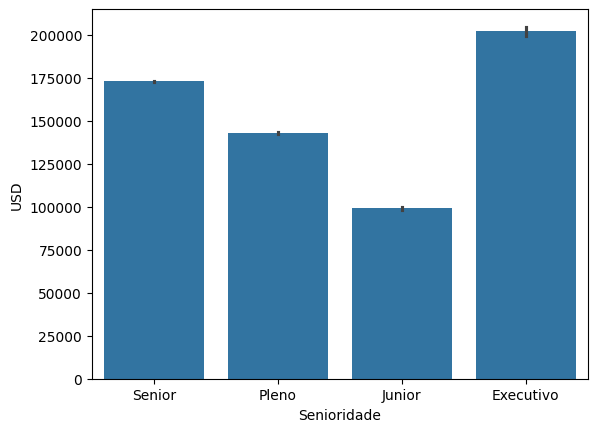

In [ ]:
sns.barplot(data=df_limpo, x="Senioridade", y="USD")

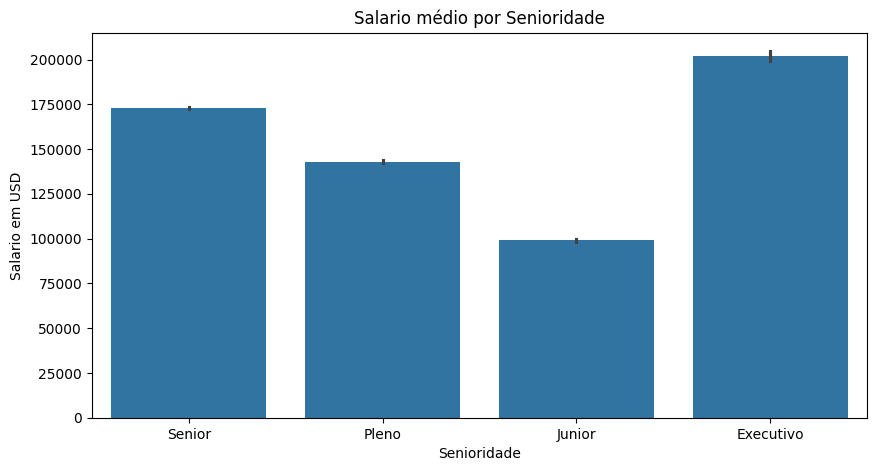

In [ ]:
mt.figure(figsize=(10, 5))
sns.barplot(data=df_limpo, x="Senioridade", y="USD")
mt.title("Salario médio por Senioridade")
mt.xlabel("Senioridade")
mt.ylabel("Salario em USD")
mt.show()

In [ ]:
df_limpo.groupby("Senioridade")["USD"].mean().sort_values(ascending=False)

,USD
Senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
ordem = df_limpo.groupby("Senioridade")["USD"].mean().sort_values(ascending=False).index

In [ ]:
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='Senioridade')

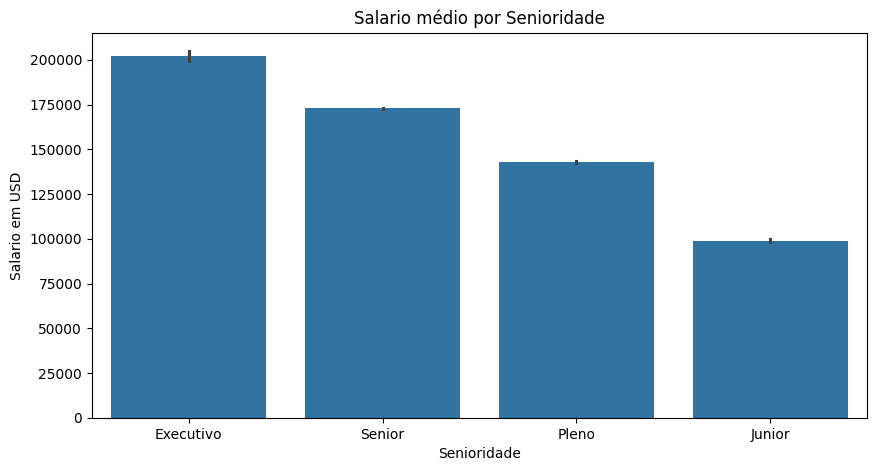

In [ ]:
mt.figure(figsize=(10, 5))
sns.barplot(data=df_limpo, x="Senioridade", y="USD", order = ordem)
mt.title("Salario médio por Senioridade")
mt.xlabel("Senioridade")
mt.ylabel("Salario em USD")
mt.show()

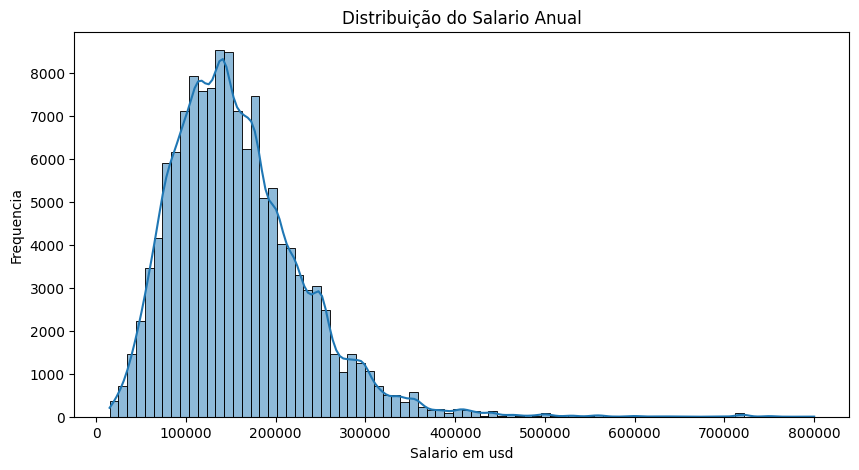

In [ ]:
mt.figure(figsize=(10, 5))
sns.histplot(df_limpo["USD"], bins = 80, kde=True)
mt.title("Distribuição do Salario Anual")
mt.xlabel("Salario em usd")
mt.ylabel("Frequencia")
mt.show()

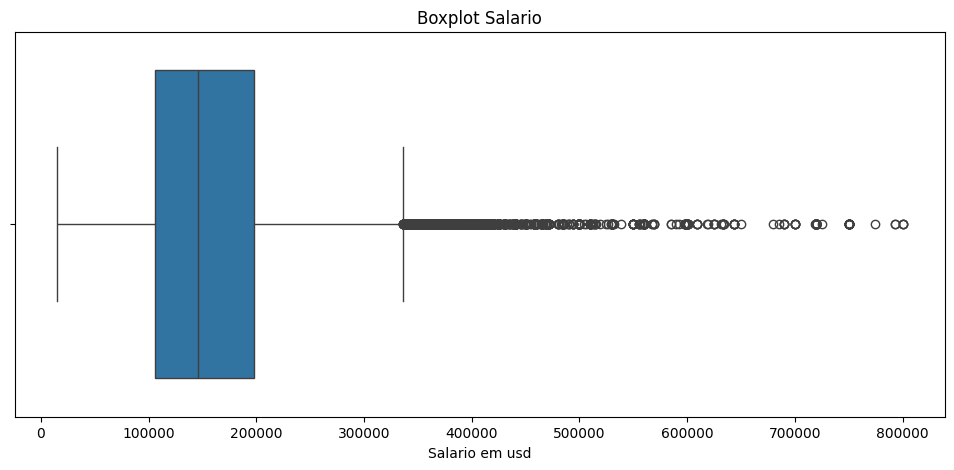

In [ ]:
mt.figure(figsize=(12, 5))
sns.boxplot(x=df_limpo["USD"])
mt.title("Boxplot Salario")
mt.xlabel("Salario em usd")
mt.show()

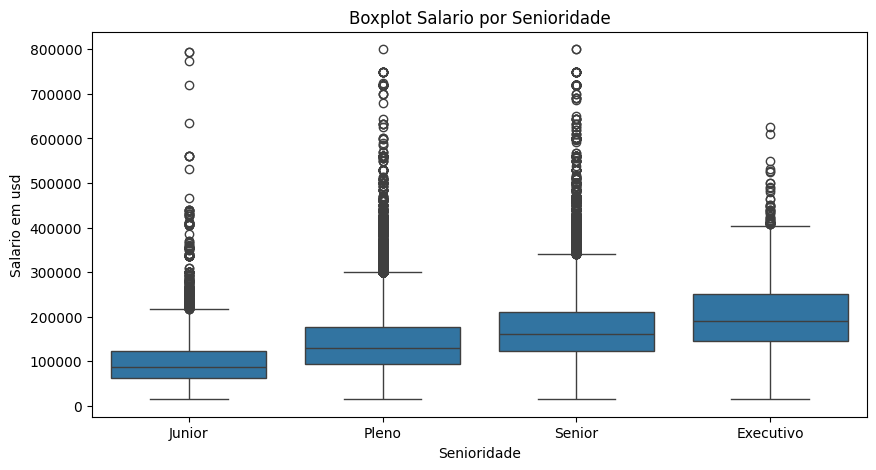

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
mt.figure(figsize=(10, 5))
sns.boxplot(x="Senioridade", y="USD", data=df_limpo, order=ordem_senioridade)
mt.title("Boxplot Salario por Senioridade")
mt.xlabel("Senioridade")
mt.ylabel("Salario em usd")
mt.show()

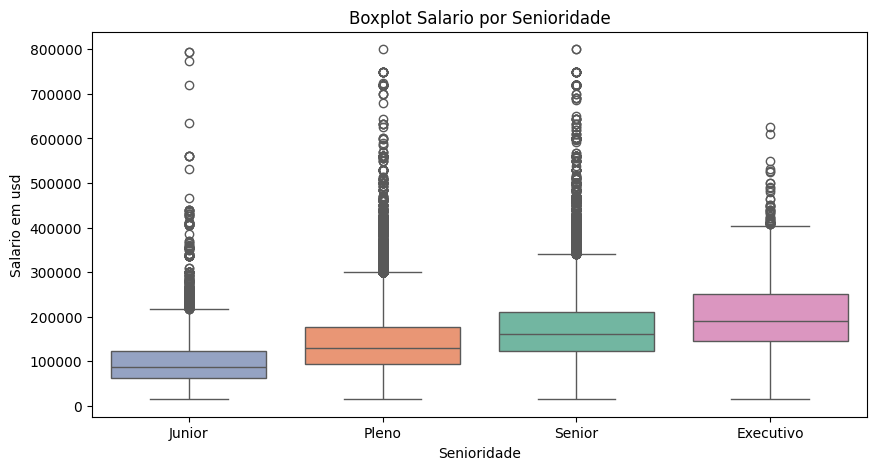

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
mt.figure(figsize=(10, 5))
sns.boxplot(x="Senioridade", y="USD", data=df_limpo, order=ordem_senioridade, palette="Set2", hue="Senioridade")
mt.title("Boxplot Salario por Senioridade")
mt.xlabel("Senioridade")
mt.ylabel("Salario em usd")
mt.show()

In [ ]:
senioridade_media_salario = df_limpo.groupby('Senioridade')['USD'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='Senioridade',
             y='USD',
             title='Média Salarial por Senioridade',
             labels={'Senioridade': 'Nível de Senioridade', 'USD': 'Média Salarial Anual (USD)'})

fig.show()

In [ ]:
remoto_contagem = df_limpo['Remoto'].value_counts().reset_index()
remoto_contagem.columns = ["Tipo_trabalho", "Quantidade"]

In [ ]:
fig = px.pie(remoto_contagem
             , names='Tipo_trabalho'
             , values='Quantidade'
             , title='Distribuição de Tipo de Trabalho')

fig.show()

In [ ]:
fig = px.pie(remoto_contagem
             , names='Tipo_trabalho'
             , values='Quantidade'
             , title='Distribuição de Tipo de Trabalho'
            , hole = 0.5)


fig.update_traces(textinfo='percent+label')
fig.show()

Desafio de tentar criar um grafico com a media salaria por pais dos cientistas de dados

In [ ]:
df_cd = df_limpo[df_limpo["Cargo"] == "Data Scientist"]

In [ ]:
media_salarial = df_cd.groupby("Empresa")['USD'].mean().reset_index()

In [ ]:
media_salarial = media_salarial.sort_values(by = "USD", ascending=True)

In [ ]:
fig = px.bar(media_salarial,
             x='Empresa',
             y='USD',
             title='Média Salarial de Cientista de dados por pais',
             labels={'Empresa': 'Pais', 'USD': 'Média Salarial Anual (USD)'},

             color='USD',
             color_continuous_scale='Viridis')

fig.show()